# Guided Project: Predicting Car Prices

## Introduction To The Data Set

In [1]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = cols)

In [2]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[continuous_values_cols]

In [4]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
num_cars.shape

(205, 15)

## Data Cleaning

In [6]:
# from numpy import nan
num_cars = num_cars.replace('?', np.nan)

In [7]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [9]:
dt = num_cars.dtypes

We now convert all columns of data type 'object' into 'float'

In [10]:
obj_cols = list(dt.loc[dt=='object'].index)
num_cars[obj_cols] = num_cars[obj_cols].astype('float')
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


Let's check how many records we have with 'null' values

In [11]:
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Above we see that we have four missing prices. We'll remove these records as we are trying to predict the price. All the remaining missing values, we'll replace with the column means.

In [12]:
num_cars= num_cars.dropna(axis = 0,subset = ['price'])
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [13]:
num_cars.shape

(201, 15)

In [14]:
num_cars = num_cars.fillna(num_cars.mean())

Check if there are any Null values left in the dataframe

In [15]:
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

We'll normalize the remaining numeric columns so that each one ranges from 0 to 1.

In [16]:
price = num_cars['price']

In [17]:
num_cars = num_cars/num_cars.max()
num_cars['price'] = price

In [18]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.476562,0.732837,0.811148,0.890278,0.816054,0.626660,0.398773,0.880711,0.642686,0.391304,0.423664,0.757576,0.428571,0.500000,13495.0
1,0.476562,0.732837,0.811148,0.890278,0.816054,0.626660,0.398773,0.880711,0.642686,0.391304,0.423664,0.757576,0.428571,0.500000,16500.0
2,0.476562,0.781638,0.822681,0.909722,0.876254,0.694294,0.466258,0.680203,0.832134,0.391304,0.587786,0.757576,0.387755,0.481481,16500.0
3,0.640625,0.825476,0.848630,0.919444,0.908027,0.574766,0.334356,0.809645,0.815348,0.434783,0.389313,0.833333,0.489796,0.555556,13950.0
4,0.640625,0.822167,0.848630,0.922222,0.908027,0.694540,0.417178,0.809645,0.815348,0.347826,0.438931,0.833333,0.367347,0.407407,17450.0


## Univariate Model

Next we'll create a simple function that uses the KNeighborsRegressor model to train and test predicted prices based on a single feature from our numeric data set.

In [19]:
def knn_train_test(train_col, target_col, df, n_neib = 5):
    df_rows = df.shape[0]
    limit = int(df_rows*.75)
    
#     from numpy.random import permutation
    np.random.seed(1)
    df = df.loc[np.random.permutation(df.index)]
    train_set = df.iloc[:limit].copy()
    test_set = df.iloc[limit:].copy()
    
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    knn = KNeighborsRegressor(n_neighbors = n_neib)
    knn.fit(train_set[[train_col]], train_set[target_col])
    pred = knn.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], pred)
    return mse**.5

We are now going to use the function above to train and test univariate models for each column in our numeric data set

In [20]:
column_errors = dict()
features = list(num_cars.columns)
features.remove('price')
for i in features:
    
    column_errors[i] = knn_train_test(i,'price',num_cars)


In [21]:
column_errors

{'bore': 6738.794882196202,
 'city-mpg': 3691.1445879851094,
 'compression-rate': 5958.572328216569,
 'curb-weight': 4011.4500359082417,
 'engine-size': 3049.6821877491616,
 'height': 6569.708741387754,
 'highway-mpg': 4323.5025303792845,
 'horsepower': 4757.622330452017,
 'length': 5268.777516281973,
 'normalized-losses': 6254.3127642404625,
 'peak-rpm': 6399.645878438257,
 'stroke': 6939.6914399959405,
 'wheel-base': 4308.008119951566,
 'width': 4034.6504100083307}

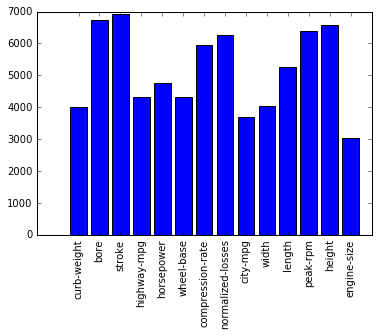

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(column_errors)), list(column_errors.values()), align='center')
plt.xticks(range(len(column_errors)), list(column_errors.keys()), rotation = 'vertical')
plt.show()

In [23]:
feat_dic = dict()

for f in features:
    k_dic = dict()
    for k in range(1, 10, 2):
        k_dic[k] = knn_train_test(train_col=f, 
                                  target_col='price', 
                                  df=num_cars, 
                                  n_neib = k)
    feat_dic[f] = k_dic

In [24]:
feat_dic

{'bore': {1: 8034.701162128302,
  3: 6084.362542715404,
  5: 6738.794882196202,
  7: 7112.687987938562,
  9: 7391.730482768966},
 'city-mpg': {1: 4403.50104473479,
  3: 4078.5076454971963,
  5: 3691.1445879851094,
  7: 3720.260209986931,
  9: 4116.471940184438},
 'compression-rate': {1: 6357.71976018286,
  3: 5732.933869082801,
  5: 5958.572328216569,
  7: 5674.840084089771,
  9: 6218.002748810658},
 'curb-weight': {1: 3906.6625644092765,
  3: 4156.281651639599,
  5: 4011.4500359082417,
  7: 3816.4436679857286,
  9: 3913.378471567553},
 'engine-size': {1: 3355.573890894805,
  3: 2860.2652866131007,
  5: 3049.6821877491616,
  7: 3057.3096260699313,
  9: 3002.709673639541},
 'height': {1: 8302.179086735921,
  3: 7020.9271504757535,
  5: 6569.708741387754,
  7: 6429.377899584863,
  9: 6467.812103688369},
 'highway-mpg': {1: 5033.224263848779,
  3: 4465.512108855548,
  5: 4323.5025303792845,
  7: 3771.0748062691346,
  9: 4085.662675555403},
 'horsepower': {1: 3554.321250115078,
  3: 4349.3

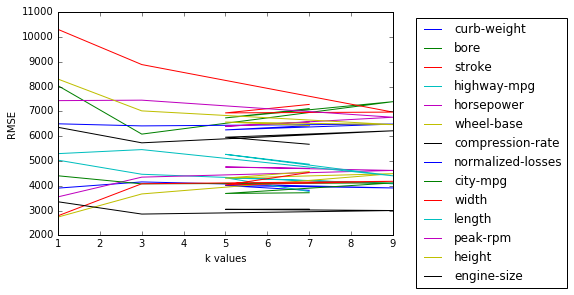

In [25]:
# legend = list()
for k, v in feat_dic.items():
#     legend.append(k)
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label = k)
    plt.xlabel('k values')
    plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    

Let's see what are the average squared errors for k 1 to 9 for each feature and sort them

In [26]:
mean_errors = dict()
for k, v in feat_dic.items():
    mean = np.mean(list(v.values()))
    mean_errors[k] = mean
mean_errors_series = pd.Series(mean_errors).sort_values()
print(mean_errors_series)
sorted_feat = list(mean_errors_series.index)
print(sorted_feat)

engine-size          3065.108133
width                3925.726016
wheel-base           3956.698405
curb-weight          3960.843278
city-mpg             4001.977086
highway-mpg          4335.795277
horsepower           4397.072515
length               5059.956655
compression-rate     5988.413758
normalized-losses    6416.708457
peak-rpm             6924.939935
height               6958.000996
bore                 7072.455412
stroke               8077.295552
dtype: float64
['engine-size', 'width', 'wheel-base', 'curb-weight', 'city-mpg', 'highway-mpg', 'horsepower', 'length', 'compression-rate', 'normalized-losses', 'peak-rpm', 'height', 'bore', 'stroke']


In [27]:
for i in sorted_feat:
    print(i)

engine-size
width
wheel-base
curb-weight
city-mpg
highway-mpg
horsepower
length
compression-rate
normalized-losses
peak-rpm
height
bore
stroke


## Multivariate Model

In [28]:
def multi_train_test(train_col, target_col, df, n_neib = 5):
    df_rows = df.shape[0]
    limit = int(df_rows*.75)
    
#     from numpy.random import permutation
    np.random.seed(1)
    df = df.loc[np.random.permutation(df.index)]
    train_set = df.iloc[:limit].copy()
    test_set = df.iloc[limit:].copy()
    
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    knn = KNeighborsRegressor(n_neighbors = n_neib)
    knn.fit(train_set[train_col], train_set[target_col])
    pred = knn.predict(test_set[train_col])
    mse = mean_squared_error(test_set[target_col], pred)
    return mse

In [29]:
feature_cols = list(num_cars.columns)
feature_cols.remove('price')
mse_multivar = multi_train_test(feature_cols,
                     target_col='price', 
                     df=num_cars, 
                     n_neib = 5)

In [30]:
rmse_multivar = mse_multivar**.5
rmse_multivar

2531.0256524447427

So we found that $2531 is the squared error when using all the features in a K = 5 nearest beighbors multivariate model. 
Let's now see what would be the errors for 2,3 ...6 features using the same model with the default 5 neighbors.

In [31]:
n_best_errors = dict()
for i in range(2,7):
    train_cols = sorted_feat[:i]
    n_best_errors[i] = (multi_train_test(train_col = train_cols, 
                                        target_col = 'price', 
                                        df = num_cars, 
                                        n_neib = 5))**.5
n_best_errors

{2: 2649.214448717604,
 3: 2985.5706236864685,
 4: 2554.4405333519458,
 5: 2559.7656059973656,
 6: 2729.6341599303787}

## Hyperparameter Tuning

For the top 3 models above, we'll vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
We'll try to answer the following questions:
* Which k value is optimal for each model? 
* How different are the k values and what accounts for the differences?

We see that the top 3 models are based on the first 2, first 4 and first 5 features from the *sorted_feat* list.

In [32]:
dic_all_errs = dict()
for i in [2,4,5]:
    dic_k_errs = dict()
    train_cols = sorted_feat[:i]
    for k in range(1,26):
        rmse = (multi_train_test(train_col = train_cols, 
                                        target_col = 'price', 
                                        df = num_cars, 
                                        n_neib = k))**.5
        dic_k_errs[k]=rmse
    dic_all_errs['{} best features'.format(i)] = dic_k_errs

In [33]:
dic_all_errs

{'2 best features': {1: 2125.189956907659,
  2: 2261.8076884668694,
  3: 2379.067306396776,
  4: 2435.638943378103,
  5: 2649.214448717604,
  6: 2687.749664341888,
  7: 2636.8980159381563,
  8: 2684.2468689888547,
  9: 2742.62616612209,
  10: 2773.216415156617,
  11: 2797.5144157802188,
  12: 2787.1468589627502,
  13: 2880.5093201544973,
  14: 2922.803559368755,
  15: 3022.649633108606,
  16: 3130.289275008926,
  17: 3188.400922250345,
  18: 3314.0919731430545,
  19: 3442.196230852504,
  20: 3550.0548789185405,
  21: 3593.79445545477,
  22: 3676.974156716001,
  23: 3741.0659162120687,
  24: 3755.459727151245,
  25: 3816.420729353001},
 '4 best features': {1: 2413.365220242164,
  2: 2303.1264683928594,
  3: 2197.2678846382714,
  4: 2385.3179601120964,
  5: 2554.4405333519458,
  6: 2501.391926778121,
  7: 2395.7548324665686,
  8: 2548.6389569902276,
  9: 2690.440614395433,
  10: 2743.6323766203113,
  11: 2749.054757540829,
  12: 2759.565069700419,
  13: 2944.5244602118983,
  14: 3082.975

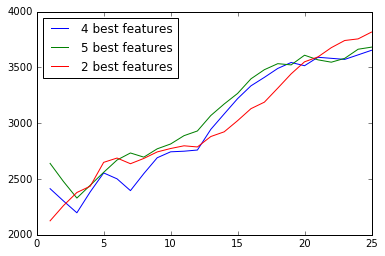

In [34]:
for n, v in dic_all_errs.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y, label = n)
    plt.legend(loc = 'upper left')

## K-Fold Cross Validation

Let's now run a cross validation for each of the features using 2 to 10 folds.

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor


col_dic = dict()
for i in num_cars.columns.drop('price'):
    k_dic = dict()
    for k in range(2,11):
        knn = KNeighborsRegressor()
        kf = KFold(n_splits = k, shuffle = True, random_state = 1)
        mses = cross_val_score(estimator = knn, 
                               X = num_cars[[i]], 
                               y = num_cars.price, 
                               cv = kf, 
                               scoring = 'neg_mean_squared_error')
        abs_mses = abs(mses)
        rmses = abs_mses**.5
        avg_rmse = np.mean(rmses)
        k_dic[k] = avg_rmse
    col_dic[i] = k_dic

In [38]:
# pd.Series(cross_avg_1).sort_values()
col_dic

{'bore': {2: 6573.014407984543,
  3: 6647.433266373225,
  4: 6489.22445343135,
  5: 6840.69636459913,
  6: 6858.12602997343,
  7: 7301.91749737217,
  8: 6561.098806706534,
  9: 6483.982006907266,
  10: 6927.9009226945755},
 'city-mpg': {2: 4768.145531818969,
  3: 4295.086760945355,
  4: 4153.465084118654,
  5: 4438.921006973339,
  6: 4297.431571802675,
  7: 4274.710504701393,
  8: 4408.568456199655,
  9: 4148.712107798843,
  10: 4339.446669631519},
 'compression-rate': {2: 6881.209632174353,
  3: 6951.597842939365,
  4: 6446.184031417209,
  5: 6383.543784289812,
  6: 6187.303559329691,
  7: 6283.037663867745,
  8: 6180.5869016149845,
  9: 6004.412649938088,
  10: 6076.370436358129},
 'curb-weight': {2: 4125.697700822327,
  3: 4171.627542724783,
  4: 4358.499700517003,
  5: 4319.745718978425,
  6: 3990.085972410758,
  7: 4262.429949490079,
  8: 4081.5398744379136,
  9: 3955.0106313241017,
  10: 4230.3024745785715},
 'engine-size': {2: 3347.5058350922454,
  3: 3211.093979783002,
  4: 329

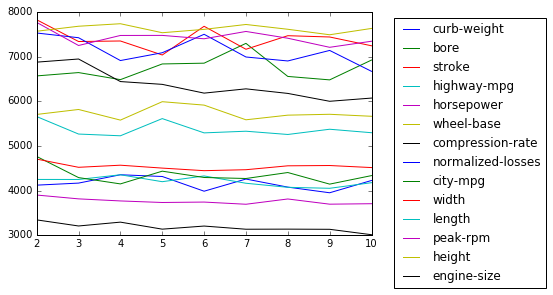

In [41]:
for k, v in col_dic.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label = k)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')